In [ ]:
!pip install catboost
!pip install scikit-optimize

In [ ]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Nagihan Proje/dermatology_database_1.csv')

In [ ]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [ ]:
df.shape

(366, 35)

In [ ]:
df['class'].value_counts()

,count
class,
1,112
3,72
2,61
5,52
4,49
6,20


**Veri Temizleme**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [ ]:
df.isna().sum()

,0
erythema,0
scaling,0
definite_borders,0
itching,0
koebner_phenomenon,0
polygonal_papules,0
follicular_papules,0
oral_mucosal_involvement,0
knee_and_elbow_involvement,0
scalp_involvement,0


In [ ]:
age_values_with_question_mark = df[df['age'] == '?']
age_values_with_question_mark

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
262,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
263,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
264,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
265,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


In [ ]:
df['age'] = df['age'].replace('?', np.nan)  # Replace '?' with NaN

# we remove rows with NaN values in the 'age' column using dropna() function
df.dropna(subset=['age'], inplace=True)

In [ ]:
age_values_with_question_mark = df[df['age'] == '?']
age_values_with_question_mark

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class


In [ ]:
age_values_with_question_mark = df[df['age'] == '?']
age_values_with_question_mark

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class


In [ ]:
df.dtypes

,0
erythema,int64
scaling,int64
definite_borders,int64
itching,int64
koebner_phenomenon,int64
polygonal_papules,int64
follicular_papules,int64
oral_mucosal_involvement,int64
knee_and_elbow_involvement,int64
scalp_involvement,int64


In [ ]:
df['age'] = df['age'].astype(float).astype(pd.Int64Dtype())  # Convert to float and then to integer

In [ ]:
df.dtypes

,0
erythema,int64
scaling,int64
definite_borders,int64
itching,int64
koebner_phenomenon,int64
polygonal_papules,int64
follicular_papules,int64
oral_mucosal_involvement,int64
knee_and_elbow_involvement,int64
scalp_involvement,int64


**Normal Dağılıma Uygunluk Testi**

* H0 hipotezi: Verinizin dağılımı normaldir.
* p-değeri < 0.05 ise, dağılımın normal olmadığına karar verilir.
* p değerinin 0.05’ten küçük olması durumunda: H0 hipotezi red edilir yani verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.
* p değerinin 0.05’ten büyük olması durumunda: H0 hipotezi red edilemez yani verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.

In [ ]:
from scipy.stats import kstest, norm
import numpy as np

# Veri setindeki sayısal sütunları seç
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Her bir sütun için Kolmogorov-Smirnov normallik testini uygula
results = {}
for col in numerical_columns:
    data = df[col].dropna()  # Eksik verileri kaldır
    standardized_data = (data - data.mean()) / data.std()  # Veriyi standart normal dağılıma göre dönüştür
    stat, p_value = kstest(standardized_data, 'norm')  # Normal dağılım hipotezine karşı test
    results[col] = {'KS Statistic': stat, 'p-value': p_value}

# Sonuçları yazdır
for col, result in results.items():
    print(f"{col}:")
    print(f"  Kolmogorov-Smirnov Statistic: {result['KS Statistic']:.4f}")
    print(f"  p-value: {result['p-value']:.4f}")
    if result['p-value'] > 0.05:
        print("  -> Dağılım normaldir.")
    else:
        print("  -> Dağılım normal değildir.")
    print()

erythema:
  Kolmogorov-Smirnov Statistic: 0.2954
  p-value: 0.0000
  -> Dağılım normal değildir.

scaling:
  Kolmogorov-Smirnov Statistic: 0.2926
  p-value: 0.0000
  -> Dağılım normal değildir.

definite_borders:
  Kolmogorov-Smirnov Statistic: 0.2785
  p-value: 0.0000
  -> Dağılım normal değildir.

itching:
  Kolmogorov-Smirnov Statistic: 0.2077
  p-value: 0.0000
  -> Dağılım normal değildir.

koebner_phenomenon:
  Kolmogorov-Smirnov Statistic: 0.3672
  p-value: 0.0000
  -> Dağılım normal değildir.

polygonal_papules:
  Kolmogorov-Smirnov Statistic: 0.4909
  p-value: 0.0000
  -> Dağılım normal değildir.

follicular_papules:
  Kolmogorov-Smirnov Statistic: 0.5241
  p-value: 0.0000
  -> Dağılım normal değildir.

oral_mucosal_involvement:
  Kolmogorov-Smirnov Statistic: 0.4906
  p-value: 0.0000
  -> Dağılım normal değildir.

knee_and_elbow_involvement:
  Kolmogorov-Smirnov Statistic: 0.4197
  p-value: 0.0000
  -> Dağılım normal değildir.

scalp_involvement:
  Kolmogorov-Smirnov Statistic

* Veri seti normal dağılıma uymadığı için parametrik olmayan testler uygulanır. Veri setindeki 33 özellik doğrusal geğerli, etiket sütunu nominal değerlidir. Etiket değişkeniniz birden fazla sınıfa sahip olduğu için Kruskal-Wallis H Testi uygulanır.

In [ ]:
df.drop(columns=['age'], inplace=True)

In [ ]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,3
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,3


In [ ]:
from scipy import stats
import pandas as pd

# Özellikler ve hedef değişkeni ayıralım
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Hedef değişkenin sınıflarını belirleyelim
class_labels = pd.unique(y)

# Kruskal-Wallis Testi Sonuçları
kruskal_results = []
for i in range(X.shape[1]):
    groups = [X[y == label][:, i] for label in class_labels]
    statistic, p_value = stats.kruskal(*groups)
    kruskal_results.append((df.columns[i], statistic, p_value))

# Sonuçları bir DataFrame'e çevirelim
kruskal_df = pd.DataFrame(kruskal_results, columns=['Feature', 'H-Statistic', 'p-value'])

# Sonuçları p-değerine göre sıralama
kruskal_df = kruskal_df.sort_values(by='p-value')

# Ayırt edici özellikleri seçme (p <= 0.05)
discriminative_features = kruskal_df[kruskal_df['p-value'] <= 0.05]
selected_features = discriminative_features['Feature'].tolist()

# Sonuçları yazdırma
print("Kruskal-Wallis Testi Sonuçları:")
print(kruskal_df)
print("\nAyırt Edici Özellikler (p <= 0.05):")
print(selected_features)


Kruskal-Wallis Testi Sonuçları:
                                Feature  H-Statistic       p-value
26     vacuolisation_damage_basal_layer   342.764018  6.321882e-72
28           saw_tooth_appearance_retes   342.550533  7.027493e-72
11                 melanin_incontinence   340.933269  1.566462e-71
30         perifollicular_parakeratosis   340.620073  1.829509e-71
14            fibrosis_papillary_dermis   339.864951  2.659928e-71
24                focal_hypergranulosis   336.543386  1.379680e-70
5                     polygonal_papules   334.775541  3.313220e-70
32                 band_like_infiltrate   333.943862  5.003067e-70
19                 clubbing_rete_ridges   327.141749  1.455362e-68
7              oral_mucosal_involvement   323.064540  1.096998e-67
21    thinning_suprapapillary_epidermis   322.451014  1.486622e-67
20               elongation_rete_ridges   298.513443  2.090505e-62
29                 follicular_horn_plug   292.516382  4.067853e-61
8            knee_and_elbow_in

In [ ]:
ayırt_edici_özellikler = ['vacuolisation_damage_basal_layer', 'saw_tooth_appearance_retes', 'melanin_incontinence', 'perifollicular_parakeratosis', 'fibrosis_papillary_dermis', 'focal_hypergranulosis', 'polygonal_papules', 'band_like_infiltrate', 'clubbing_rete_ridges', 'oral_mucosal_involvement', 'thinning_suprapapillary_epidermis', 'elongation_rete_ridges', 'follicular_horn_plug', 'knee_and_elbow_involvement', 'follicular_papules', 'spongiosis', 'scalp_involvement', 'exocytosis', 'munro_microabcess', 'PNL_infiltrate', 'koebner_phenomenon', 'definite_borders', 'spongiform_pustule', 'disappearance_granular_layer', 'itching', 'parakeratosis', 'scaling', 'family_history', 'erythema', 'eosinophils_infiltrate', 'acanthosis', 'hyperkeratosis', 'inflammatory_mononuclear_infiltrate']

**Modelleme için Verileri Hazırlama**
* Bu bölüm, makine öğrenimi modeli için verilerin hazırlanmasına odaklanır. Özellik ölçeklendirme, kategorik değişkenlerin kodlanması ve verilerin eğitim ve test setlerine ayrılması gibi çeşitli ön işleme adımlarını içerir. Verilerin doğru bir şekilde hazırlanması, makine öğrenimi modelleri için uygun bir formatta olmasını sağlar ve eğitim ve değerlendirme süreçlerinde kullanılabilir hale getirir.

In [ ]:
X = df[ayırt_edici_özellikler]
y = df.iloc[:, -1].values

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 110)

In [ ]:
print("Train set:",X_train.shape, y_train.shape)
print("Test set:",X_test.shape, y_test.shape)

Train set: (286, 33) (286,)
Test set: (72, 33) (72,)


**VERİ GÖRSELLEŞTİRME**

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

corr_matrix

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,class
erythema,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.028225,-0.115275,-0.033391,0.138519,0.180740,...,-0.020583,0.153229,-0.003972,0.038837,-0.012408,-0.008997,0.006100,0.093026,-0.013850,-0.324846
scaling,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.075013,-0.098665,-0.084815,0.294258,0.295932,...,-0.090620,0.205046,-0.113133,0.023095,-0.118109,-0.014702,-0.015402,-0.008453,-0.134966,-0.458499
definite_borders,0.248062,0.347106,1.000000,-0.058534,0.239778,0.322657,-0.176715,0.280341,0.301187,0.261495,...,0.285024,0.350007,0.291443,-0.252643,0.267409,-0.093264,-0.131788,0.124812,0.275099,-0.381456
itching,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.412525,-0.144027,0.361761,-0.296824,-0.152562,...,0.369593,-0.190548,0.371404,0.003028,0.380075,-0.176096,-0.184385,0.051553,0.389887,0.039744
koebner_phenomenon,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.388233,-0.175676,0.387937,-0.065438,0.013496,...,0.399235,0.002588,0.372236,0.006726,0.377539,-0.150348,-0.166956,0.110295,0.377323,-0.089586
polygonal_papules,0.028225,-0.075013,0.322657,0.412525,0.388233,1.000000,-0.139384,0.863269,-0.278843,-0.258231,...,0.884553,-0.122467,0.911598,0.091031,0.894775,-0.097084,-0.112007,0.258753,0.904112,0.064451
follicular_papules,-0.115275,-0.098665,-0.176715,-0.144027,-0.175676,-0.139384,1.000000,-0.134484,0.220849,-0.007320,...,-0.121232,-0.161487,-0.142335,-0.012624,-0.141489,0.784991,0.844721,-0.093833,-0.136311,0.488708
oral_mucosal_involvement,-0.033391,-0.084815,0.280341,0.361761,0.387937,0.863269,-0.134484,1.000000,-0.286160,-0.264638,...,0.885306,-0.109676,0.886238,0.129879,0.873730,-0.084040,-0.108070,0.276068,0.890685,0.062185
knee_and_elbow_involvement,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.278843,0.220849,-0.286160,1.000000,0.659286,...,-0.271063,0.480594,-0.285184,-0.417851,-0.283383,0.231977,0.256811,-0.079246,-0.279753,-0.382276
scalp_involvement,0.180740,0.295932,0.261495,-0.152562,0.013496,-0.258231,-0.007320,-0.264638,0.659286,1.000000,...,-0.261302,0.485260,-0.257697,-0.425421,-0.262429,-0.055091,-0.020456,0.027887,-0.255333,-0.534716


In [ ]:
!pip install seaborn

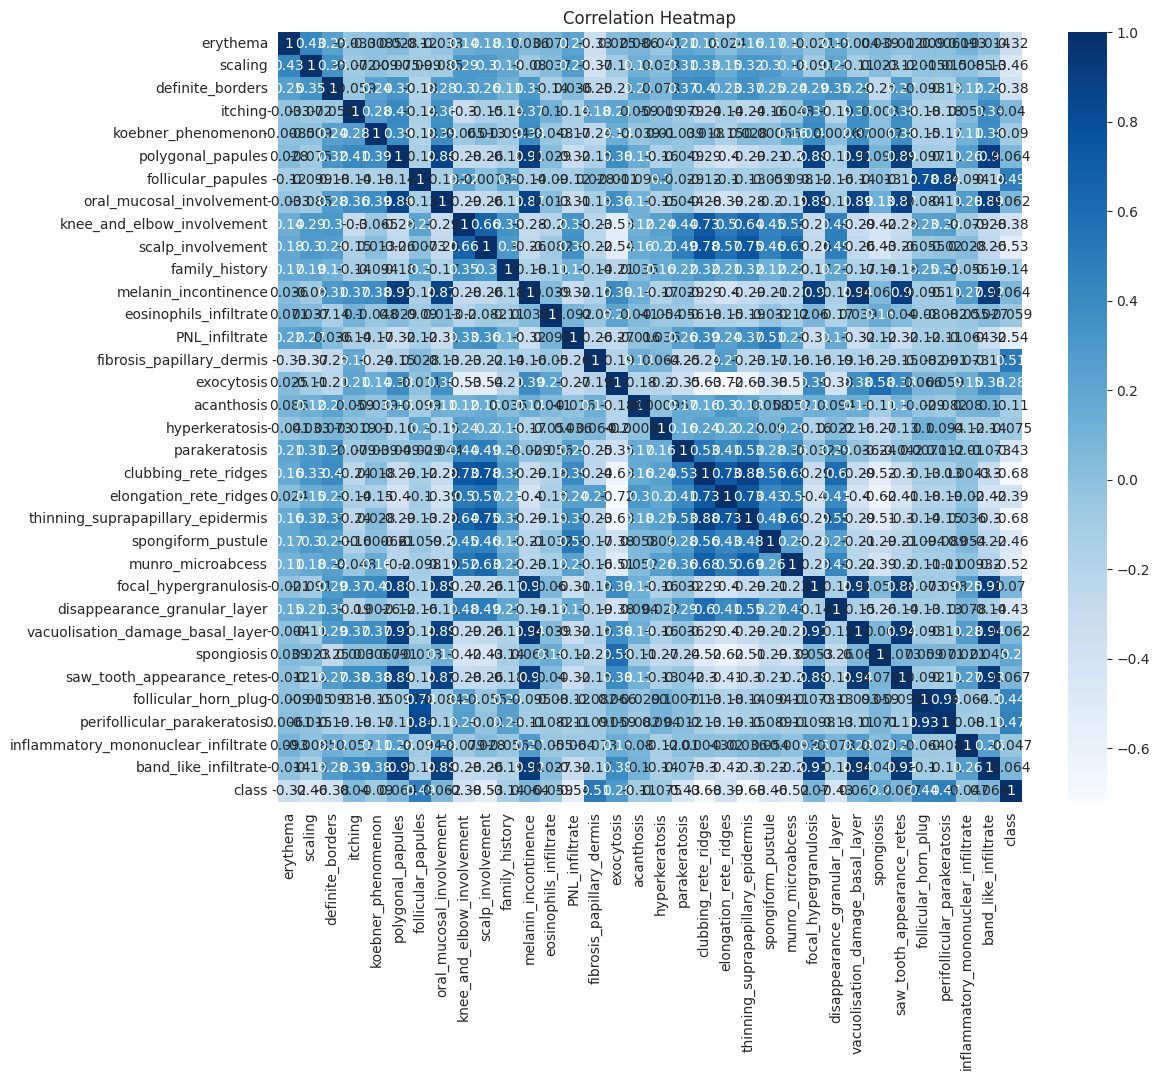

In [ ]:
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Define a dictionary to store the results
results = {}

**BAGGING**

* **RANDOM FOREST**
* Birden fazla karar ağacını bir araya getirerek tahminlerini birleştiren bir topluluk yöntemidir. Yüksek boyutlu problemlerde güçlü ve dayanıklı bir yöntemdir ve özellikler ile hedef sınıf arasındaki doğrusal olmayan ilişkileri yönetebilir.

In [ ]:
%%time
start_time = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Random Forest'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 336 ms, sys: 0 ns, total: 336 ms
Wall time: 697 ms


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.93      0.93      0.93        15
           2       1.00      1.00      1.00        14
           3       0.90      0.90      0.90        10
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         3

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



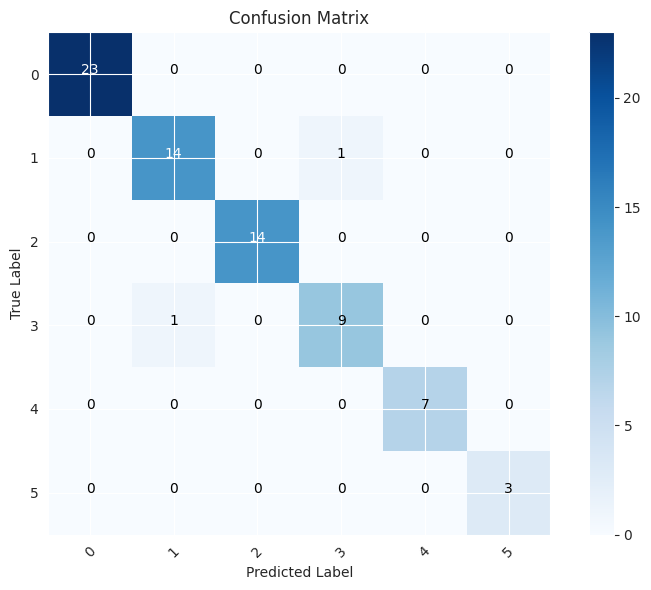

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
classes = ['0', '1', '2', '3', '4', '5']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the cells of the confusion matrix with values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

**BOOSTING**

**AdaBoost**

In [ ]:
%%time
start_time = time.time()
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['AdaBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 209 ms, sys: 983 µs, total: 210 ms
Wall time: 220 ms


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.34      1.00      0.51        15
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        10
           4       1.00      1.00      1.00         7
           5       0.00      0.00      0.00         3

    accuracy                           0.60        72
   macro avg       0.39      0.49      0.41        72
weighted avg       0.49      0.60      0.51        72



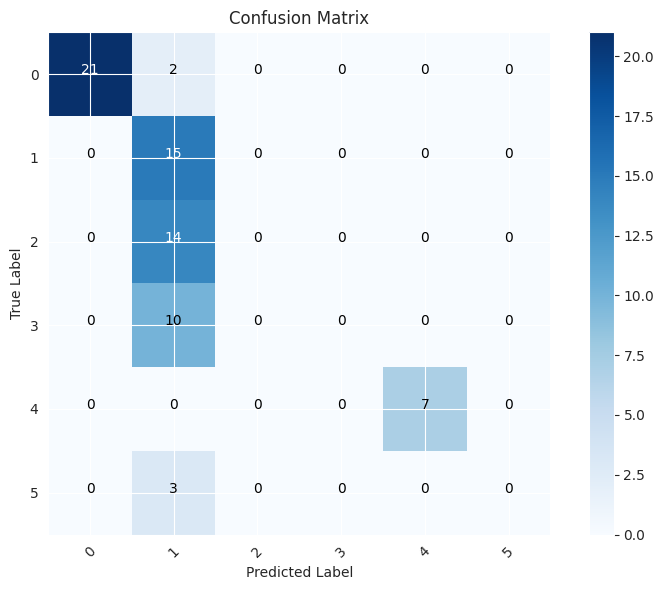

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
classes = ['0', '1', '2', '3', '4', '5']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the cells of the confusion matrix with values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

**STACKING**

In [ ]:
import time
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100)),             # RandomForest
    ('dt', DecisionTreeClassifier(max_depth=5)),                   # Decision Tree
    ('knn', KNeighborsClassifier(n_neighbors=5)),                  # K-Nearest Neighbors
    ('lr', LogisticRegression(max_iter=1000)),                     # Logistic Regression
    ('gnb', GaussianNB()),                                         # Naive Bayes
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),  # XGBoost
    ('lgbm', LGBMClassifier(n_estimators=100)),# LightGBM
    ('gb', GradientBoostingClassifier(n_estimators=100)),           # Gradient Boosting
    ('ada', AdaBoostClassifier(n_estimators=100))                 # AdaBoost
]

In [ ]:
# Meta model
meta_model = LogisticRegression(max_iter=1000)


In [ ]:
# Stacking Classifier
stacking = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model
)

In [ ]:
# Veri setini eğitme ve tahmin yapma
start_time = time.time()
stacking.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 118
[LightGBM] [Info] Number of data points in the train set: 286, number of used features: 31
[LightGBM] [Info] Start training from score -1.178655
[LightGBM] [Info] Start training from score -1.849329
[LightGBM] [Info] Start training from score -1.612941
[LightGBM] [Info] Start training from score -2.018406
[LightGBM] [Info] Start training from score -1.942420
[LightGBM] [Info] Start training from score -2.822778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('dt', DecisionTreeClassifier(max_depth=5)),
                               ('knn', KNeighborsClassifier()),
                               ('lr', LogisticRegression(max_iter=1000)),
                               ('gnb', GaussianNB()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_s...
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('lgbm', LGBMClassifier()),
                               ('gb', GradientBoostingClassifier()),
                               ('ada', AdaBoostClassifier(n_estimators=100))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [ ]:
y_pred = stacking.predict(X_test)

end_time = time.time()
training_time = end_time - start_time


In [ ]:
results['Stacking'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

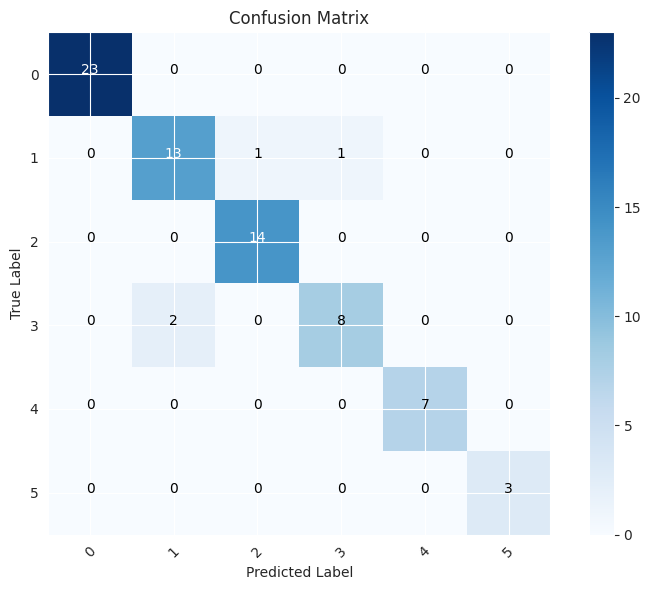

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
classes = ['0', '1', '2', '3', '4', '5']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the cells of the confusion matrix with values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [ ]:
# Create a DataFrame from the results
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])

df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Random Forest,0.972222,0.972222,0.972222,0.972222,0.673412
AdaBoost,0.597222,0.487689,0.597222,0.508079,0.206697
Stacking,0.944444,0.943827,0.944444,0.943587,10.591519
